In [1]:
import pandas as pd
import os
import phik
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import sklearn
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer

In [4]:
os.getcwd()

'/home/wsievolod/projects/basketball'

In [5]:
df = pd.read_csv('dataset/csv/game.csv')
df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [6]:
no_display_cols = ['season_id', 'team_id_home', 'game_id', 'team_abbreviation_home', 'team_name_home', 'team_id_away']
no_display_cols.extend(df.select_dtypes(include="object").columns)
no_display_cols

['season_id',
 'team_id_home',
 'game_id',
 'team_abbreviation_home',
 'team_name_home',
 'team_id_away',
 'team_abbreviation_home',
 'team_name_home',
 'game_date',
 'matchup_home',
 'wl_home',
 'team_abbreviation_away',
 'team_name_away',
 'matchup_away',
 'wl_away',
 'season_type']

In [7]:
df[df.columns.drop(no_display_cols)] = PowerTransformer().fit_transform(df[df.columns.drop(no_display_cols)])

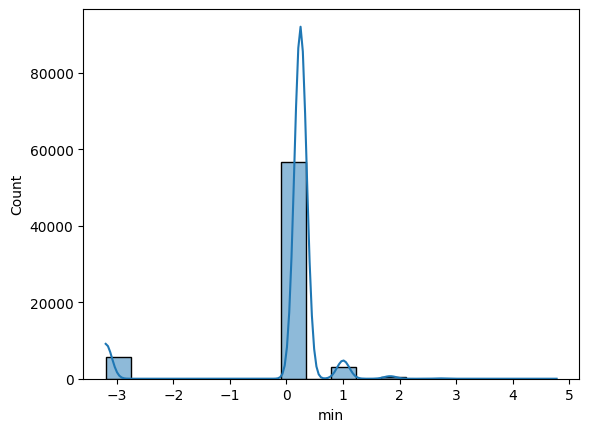

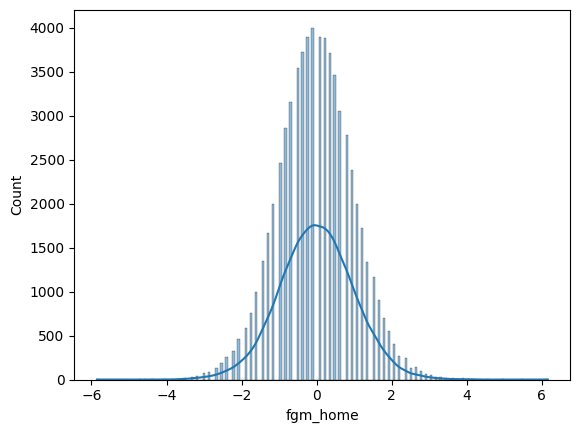

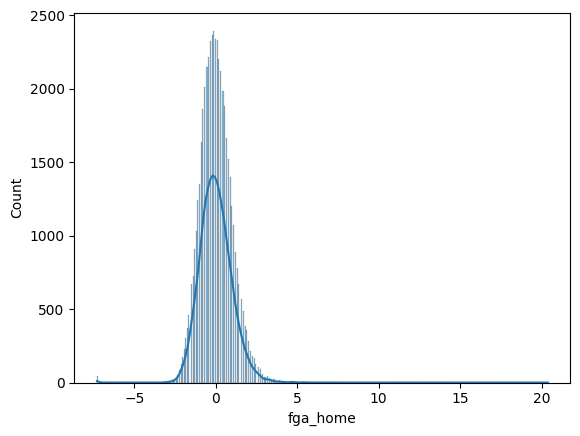

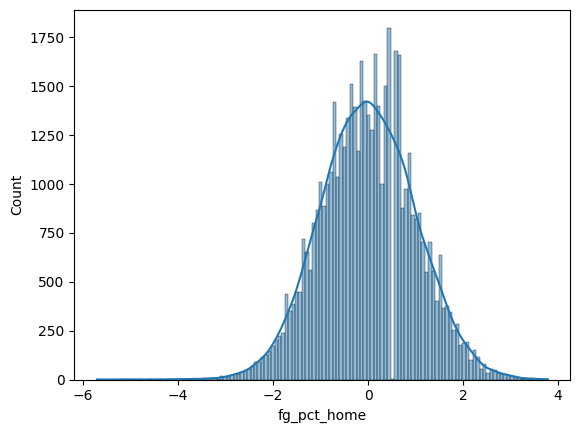

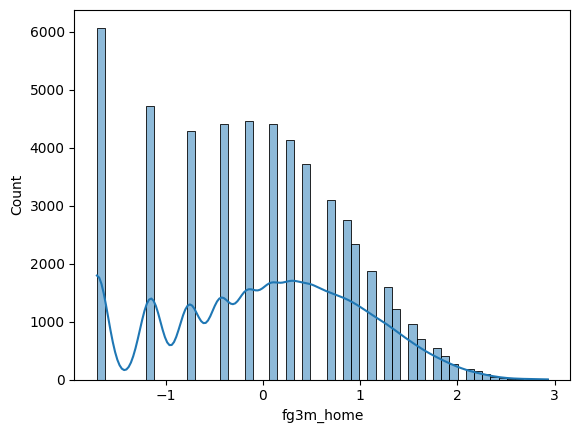

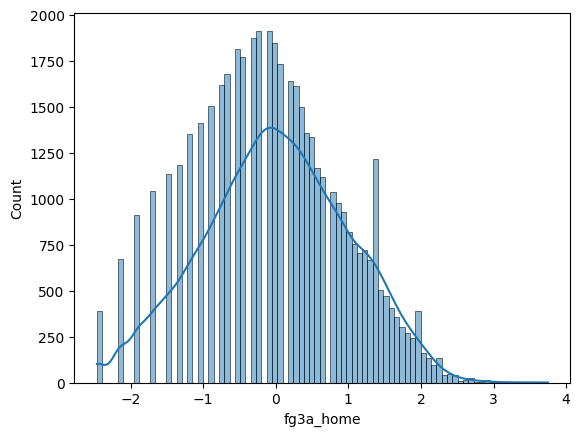

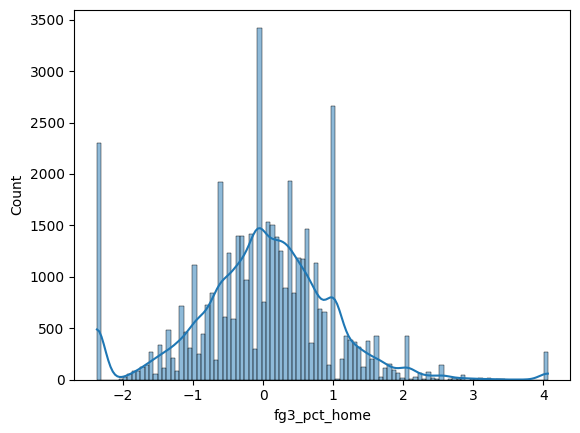

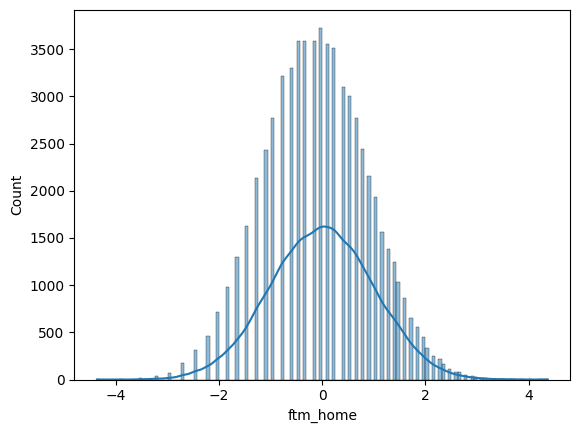

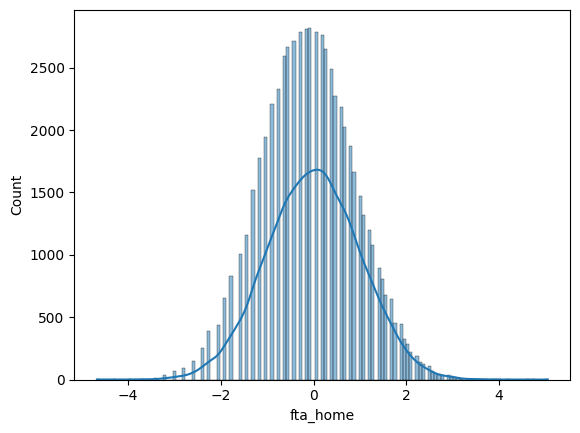

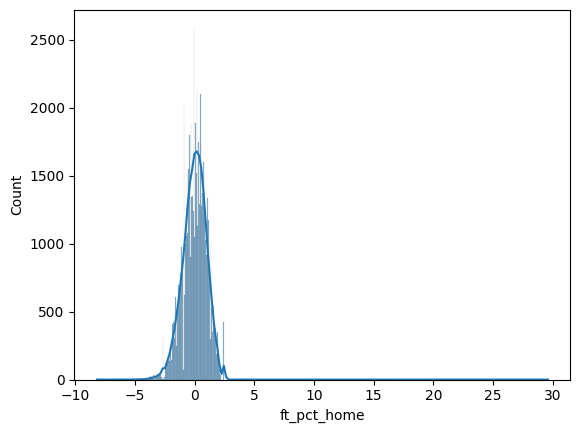

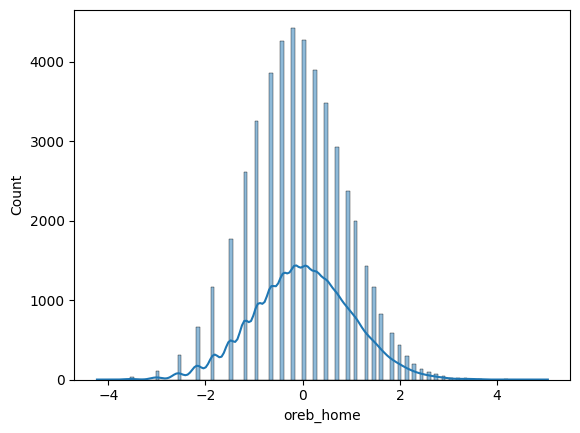

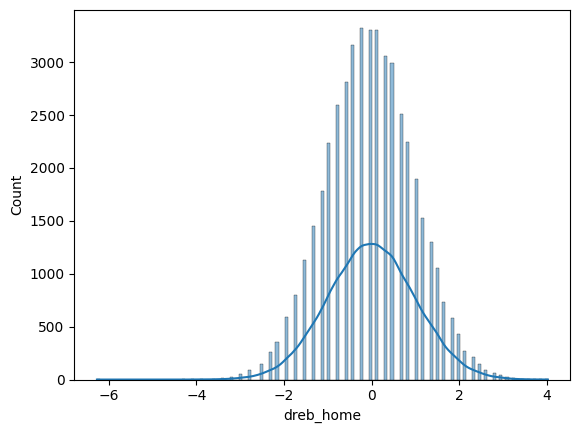

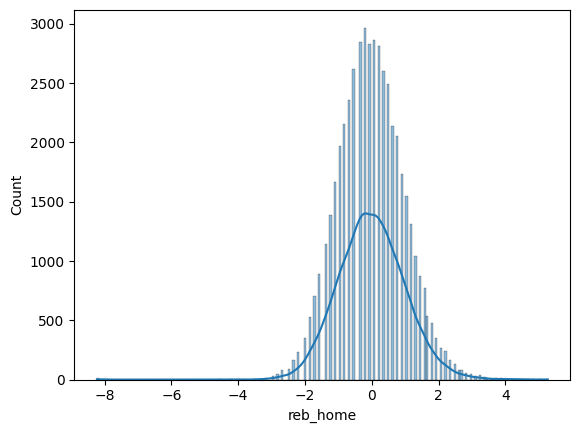

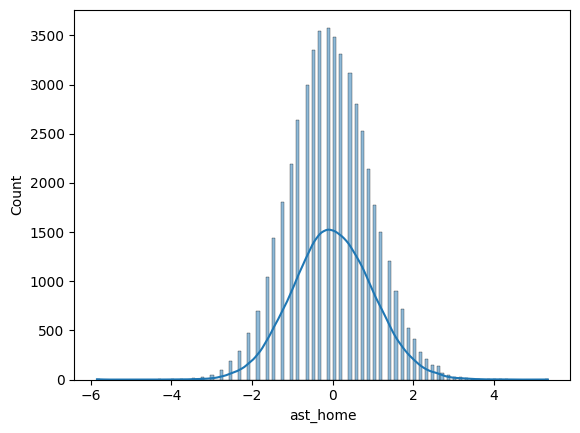

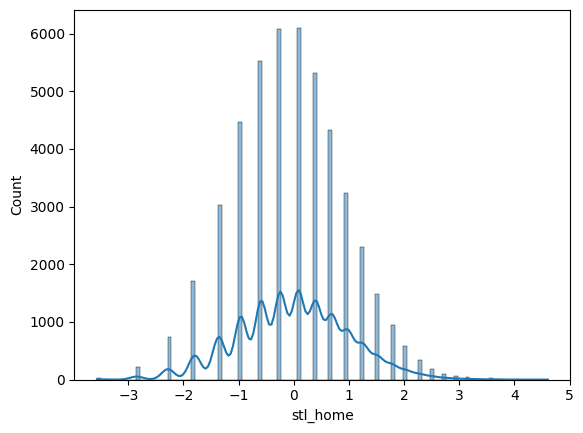

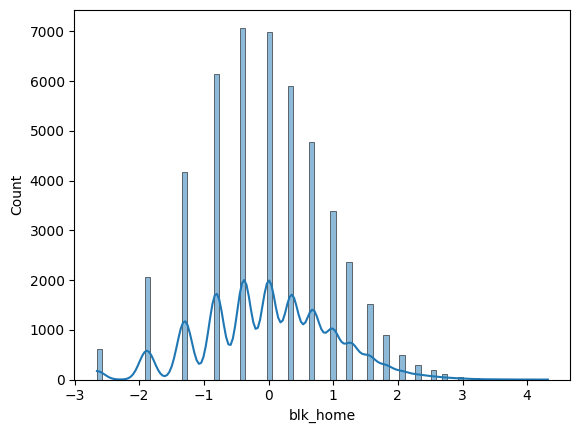

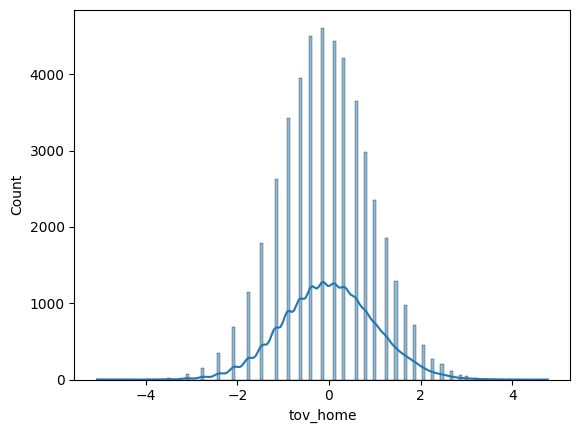

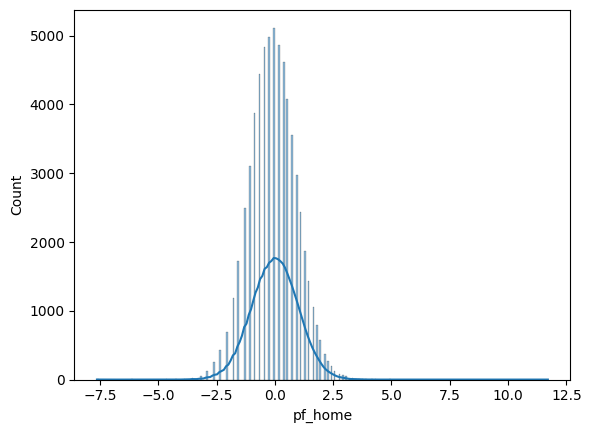

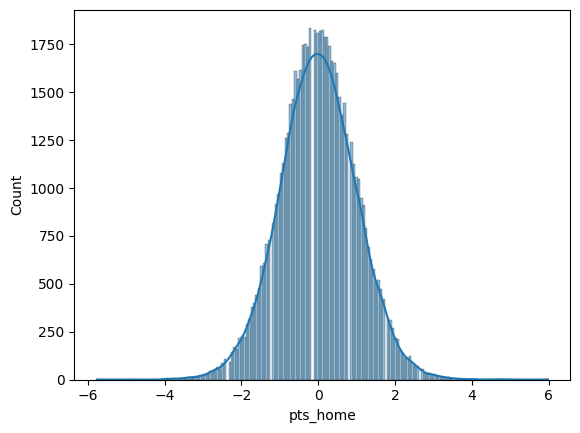

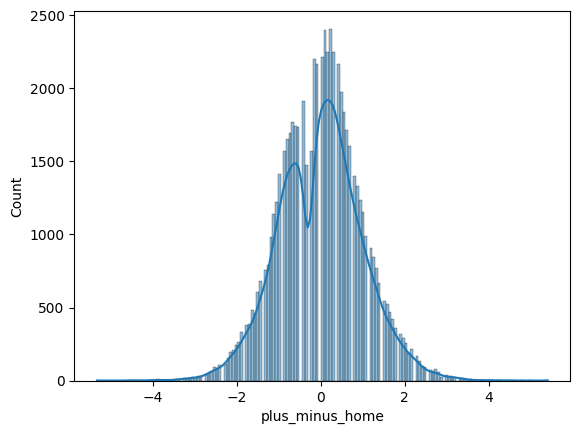

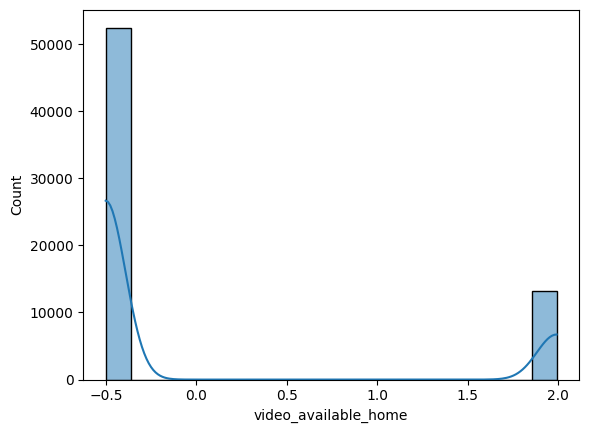

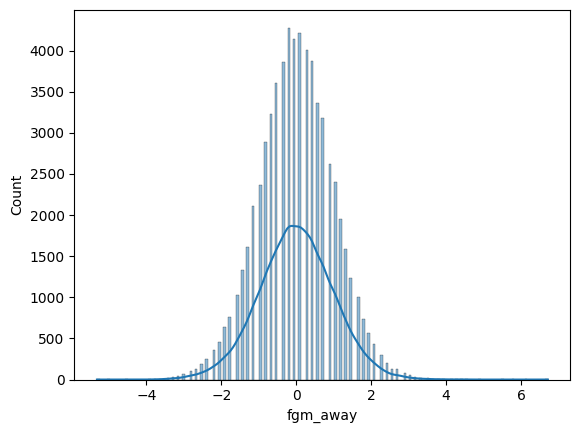

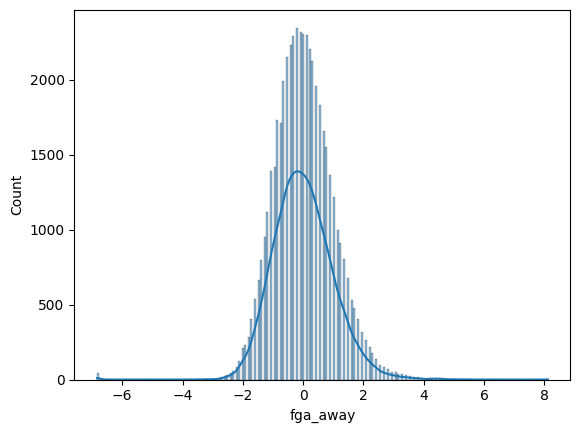

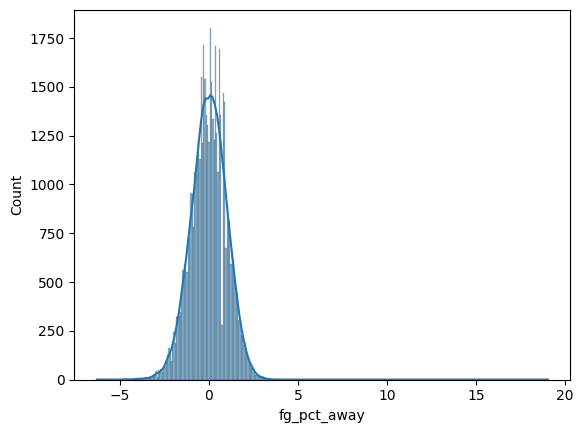

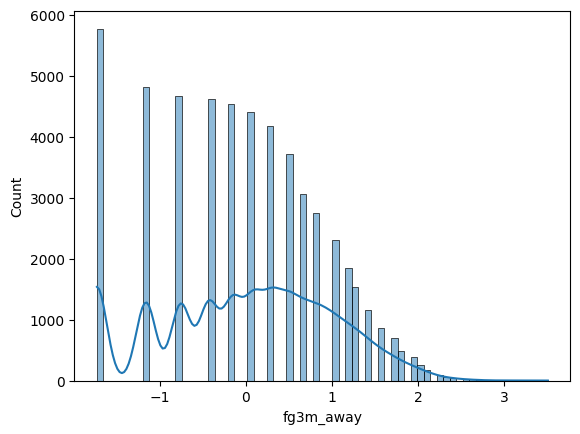

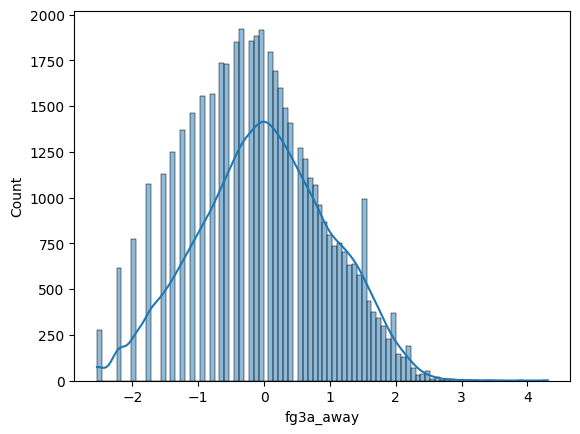

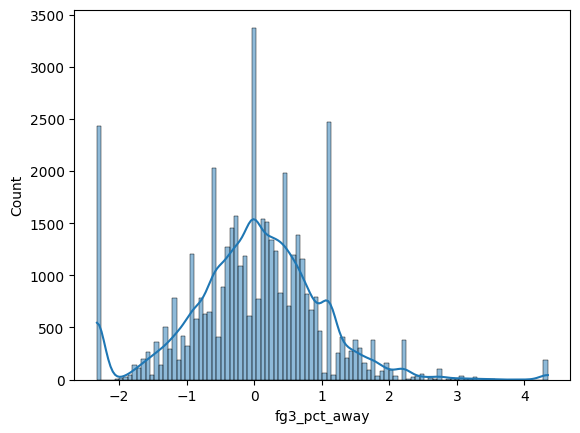

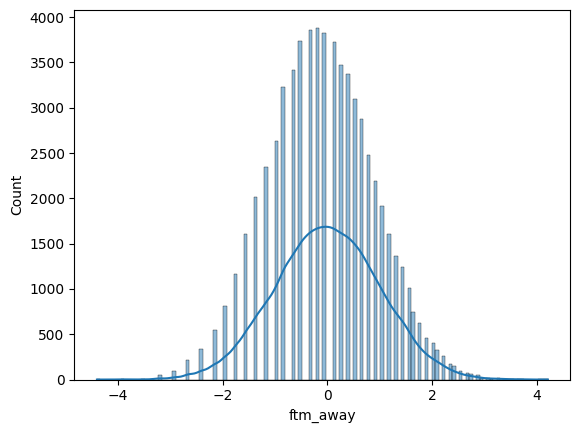

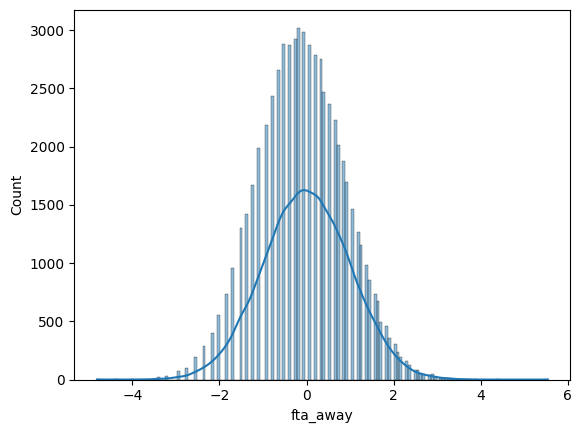

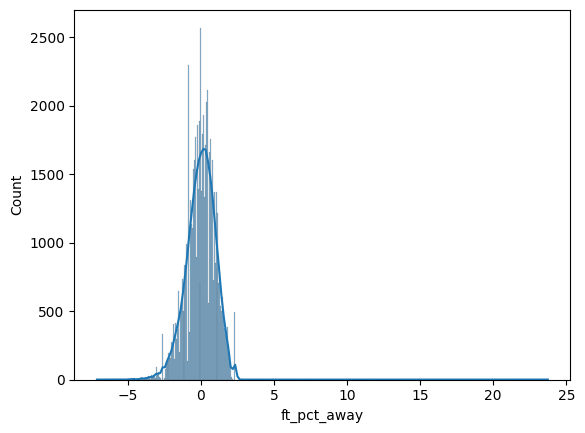

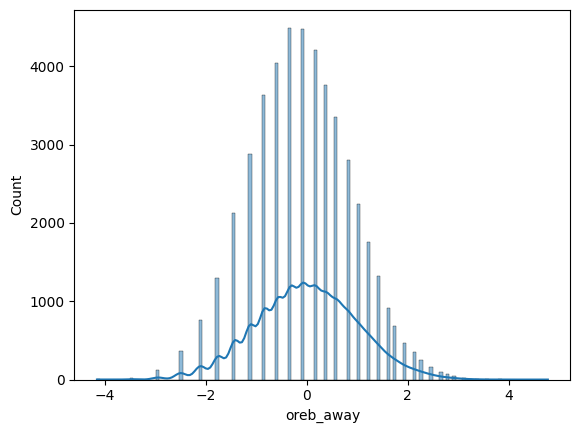

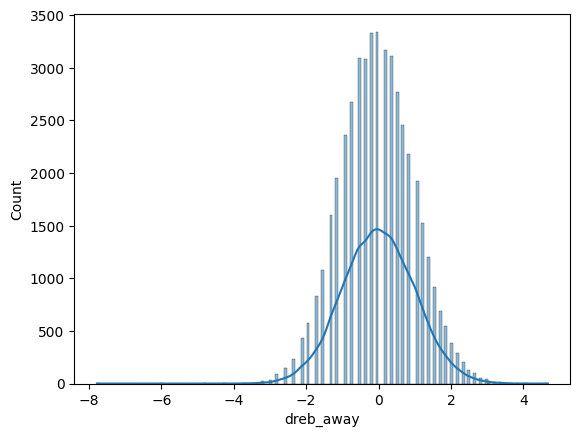

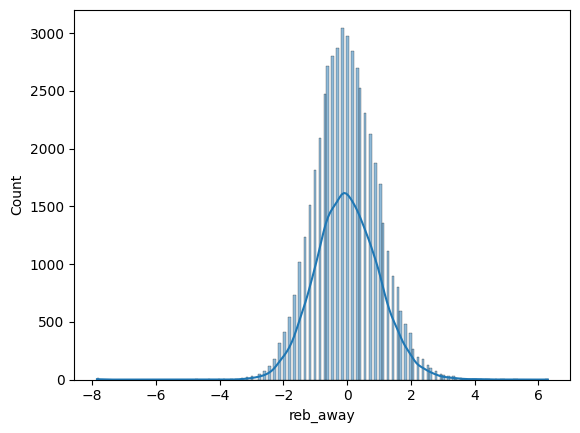

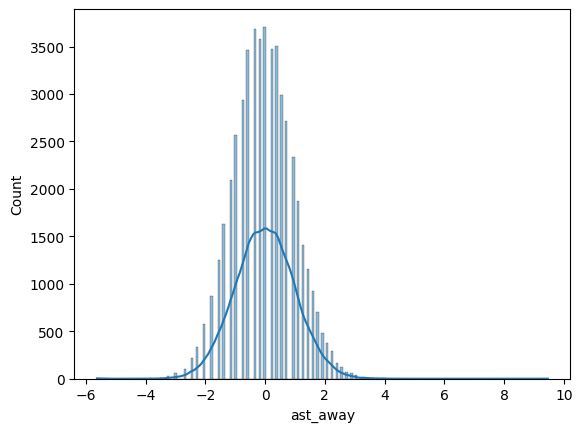

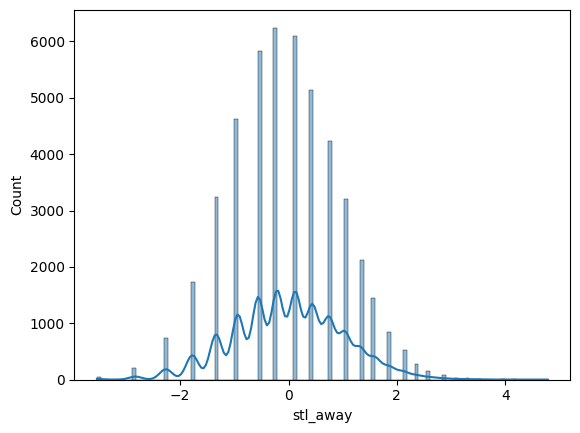

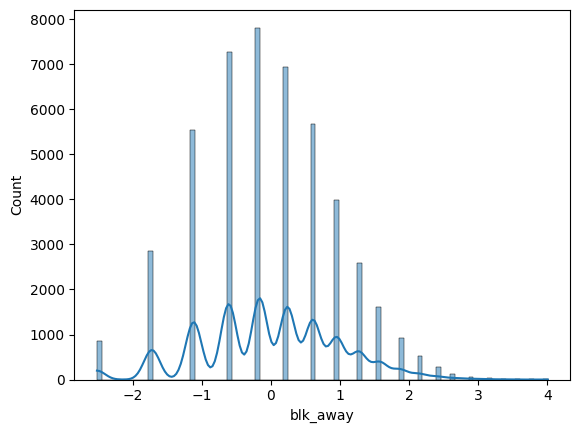

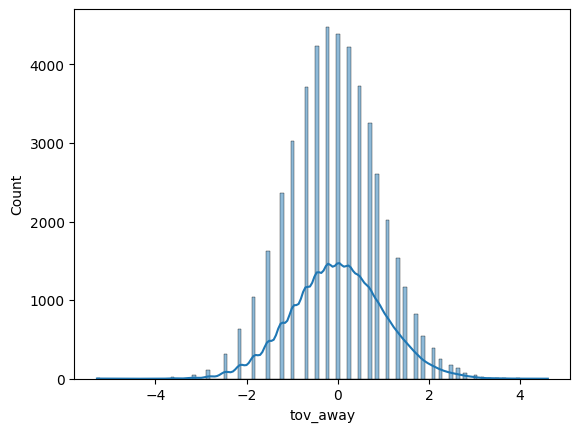

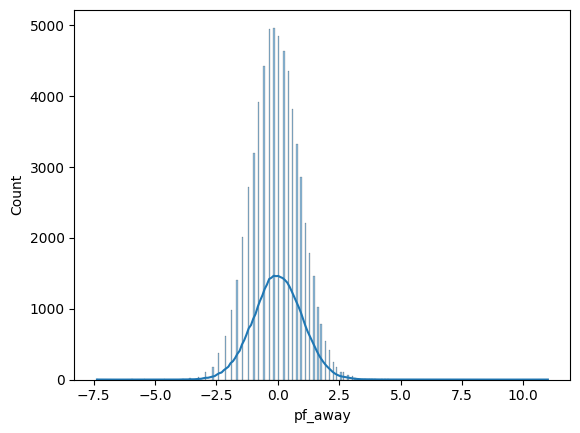

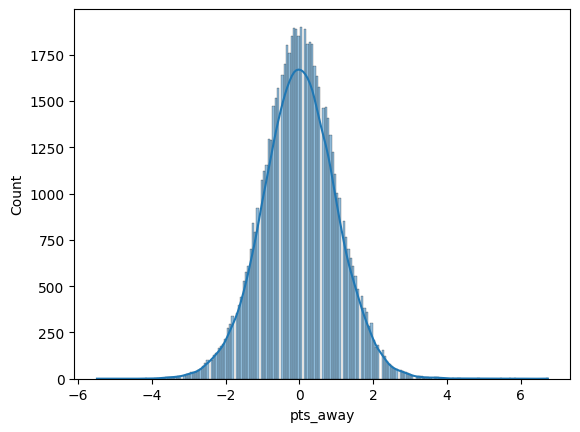

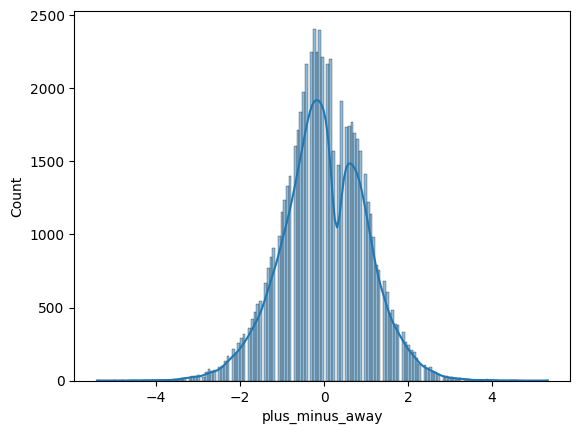

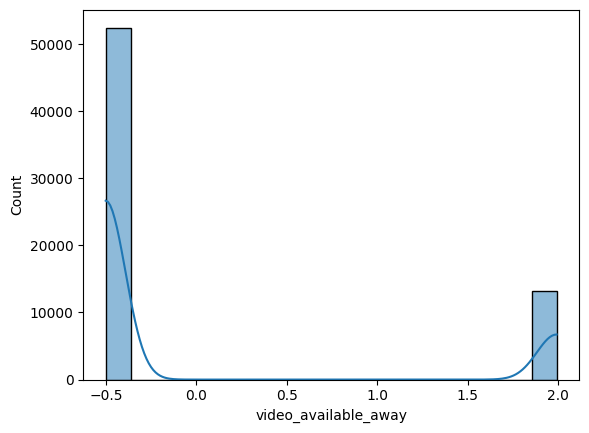

In [8]:
for col in df.columns:
    if col not in no_display_cols:
        sns.histplot(df[col], kde=True)
        plt.show()

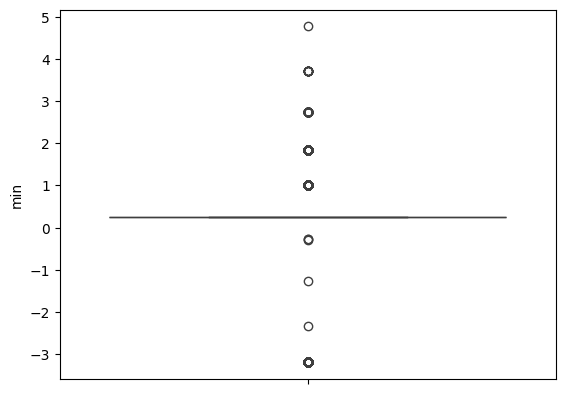

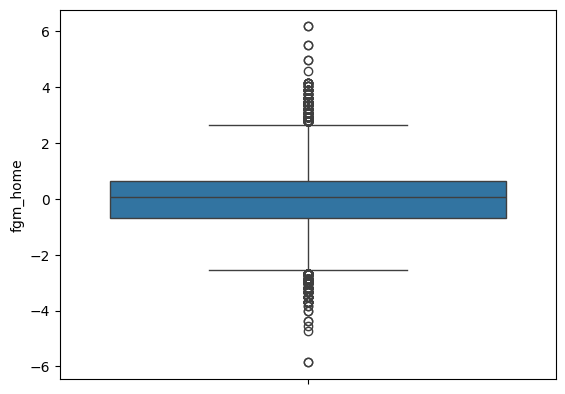

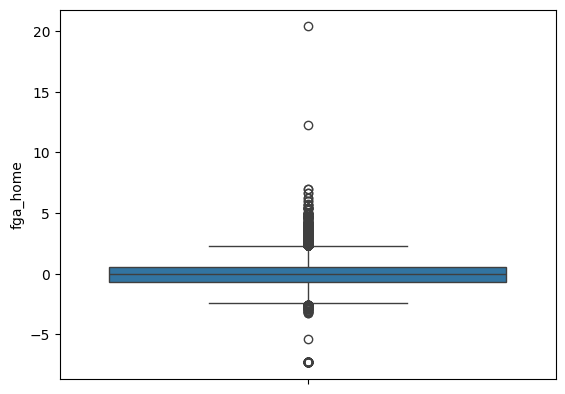

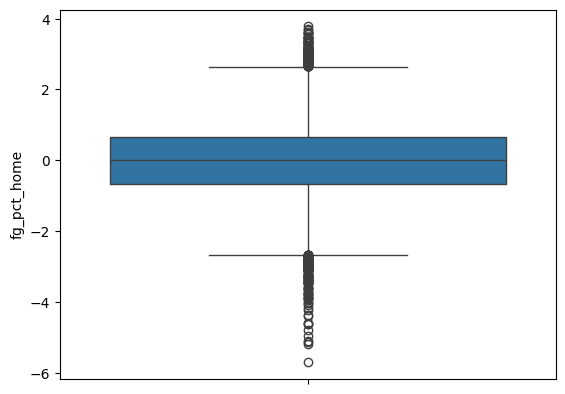

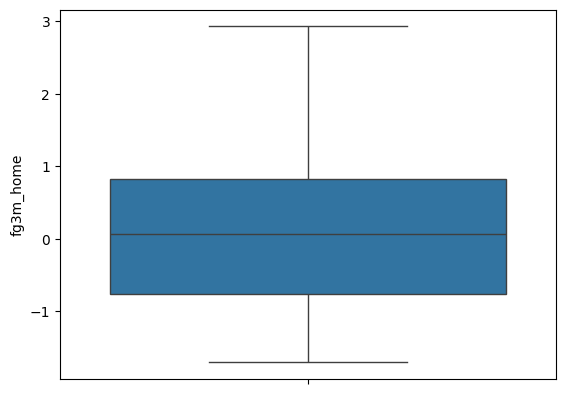

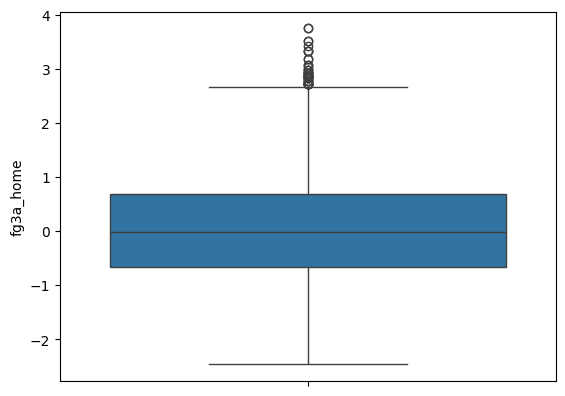

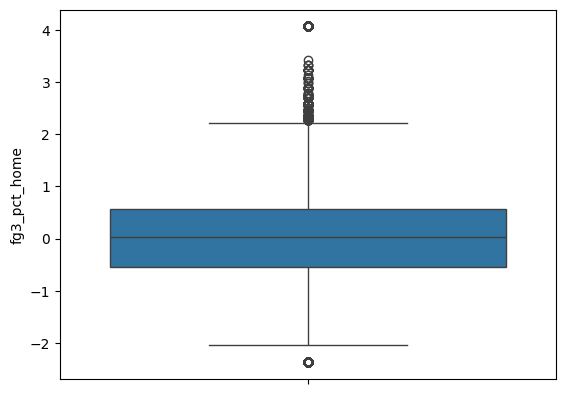

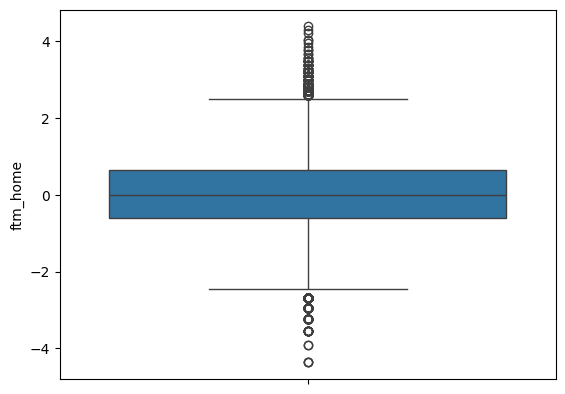

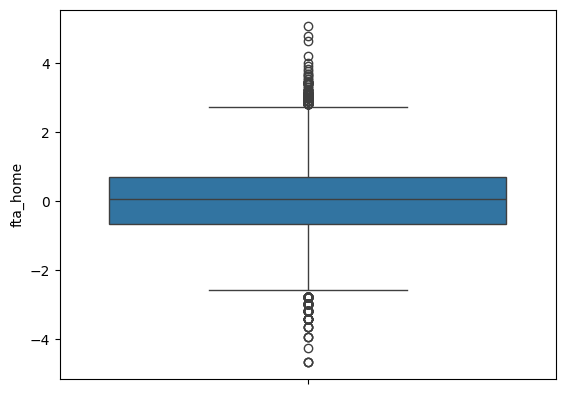

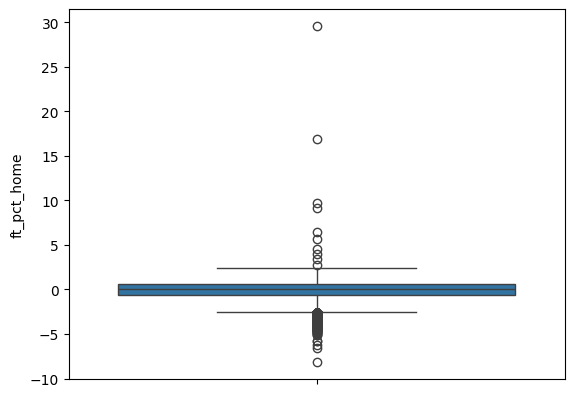

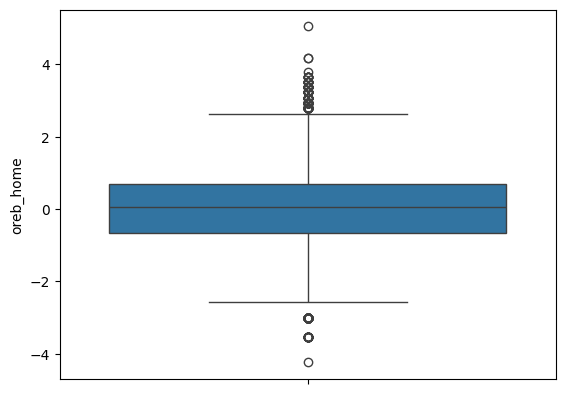

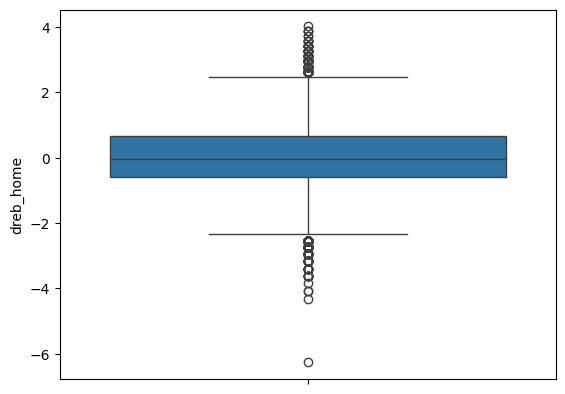

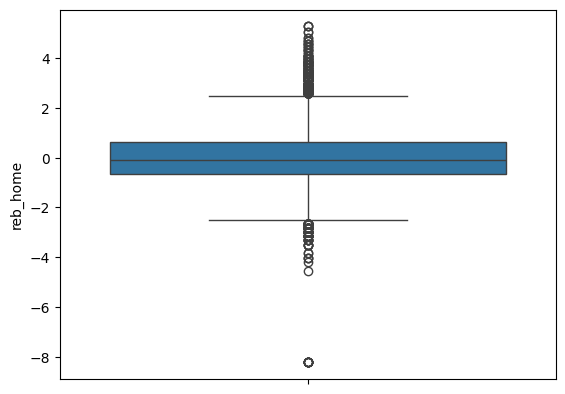

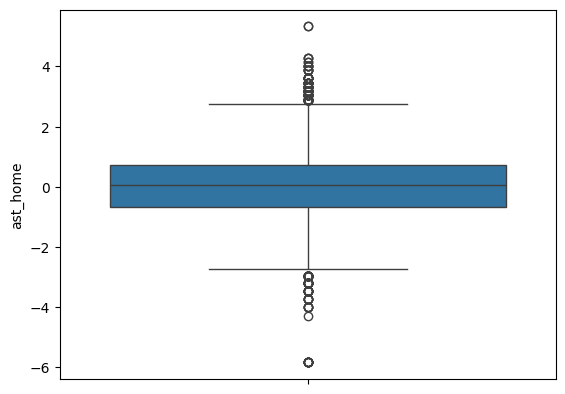

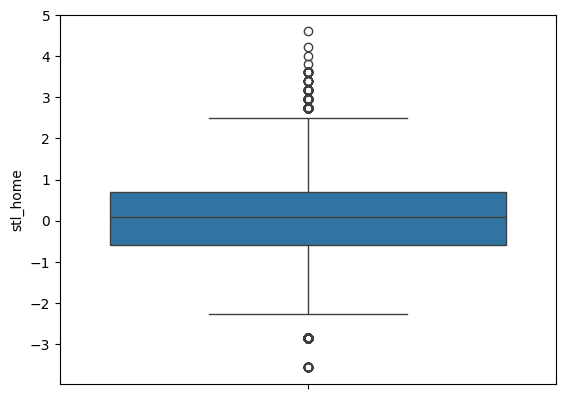

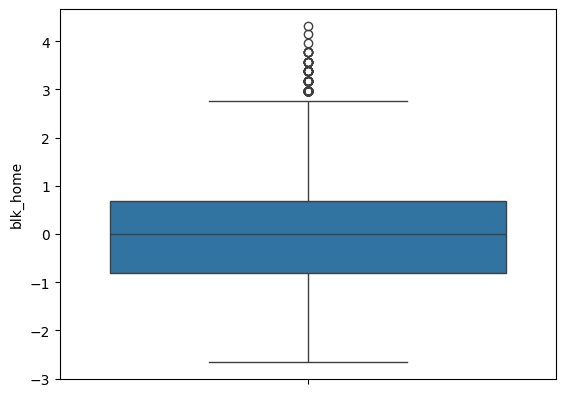

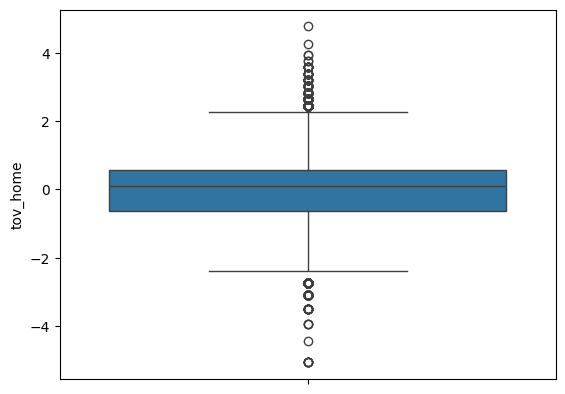

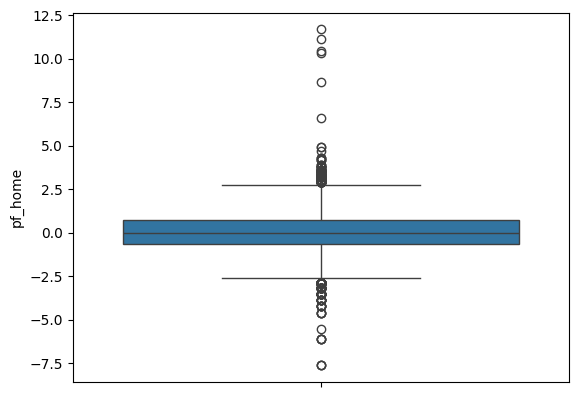

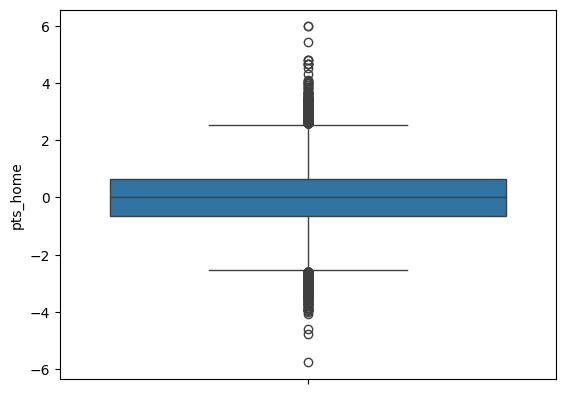

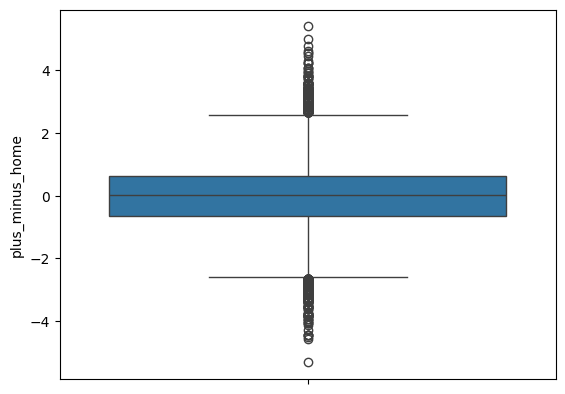

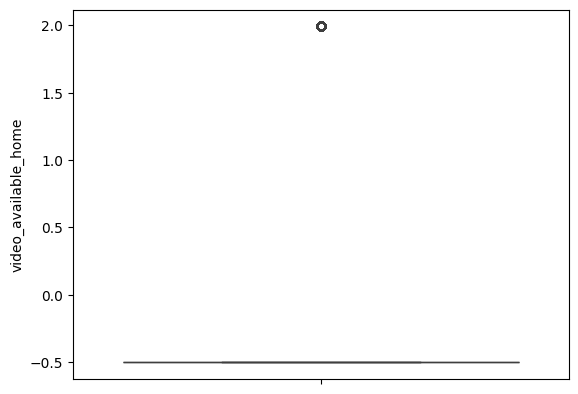

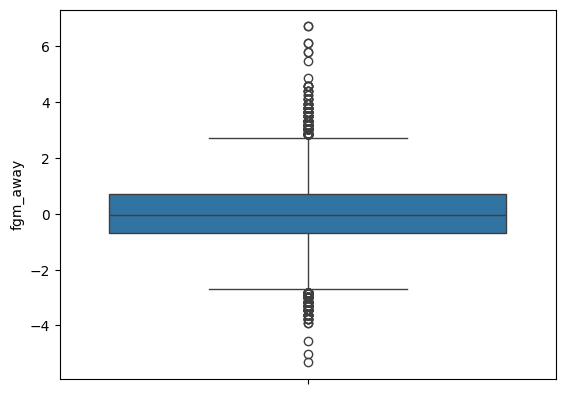

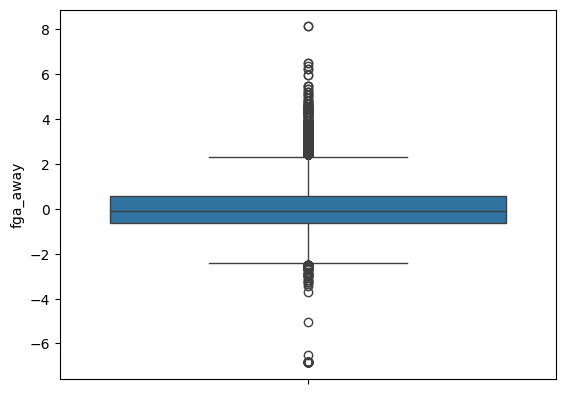

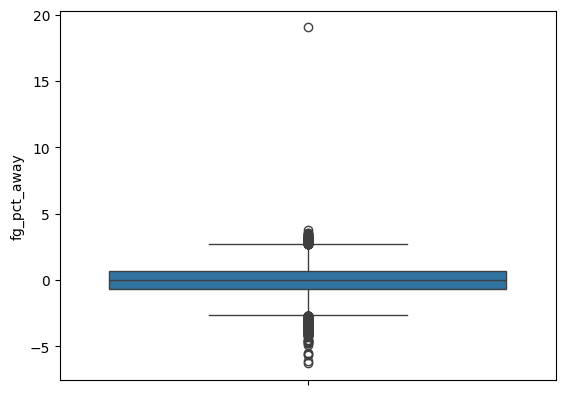

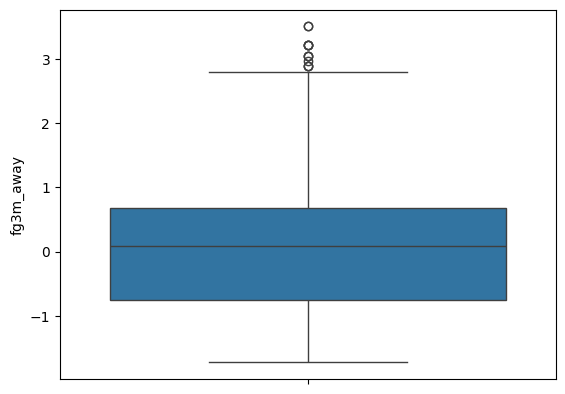

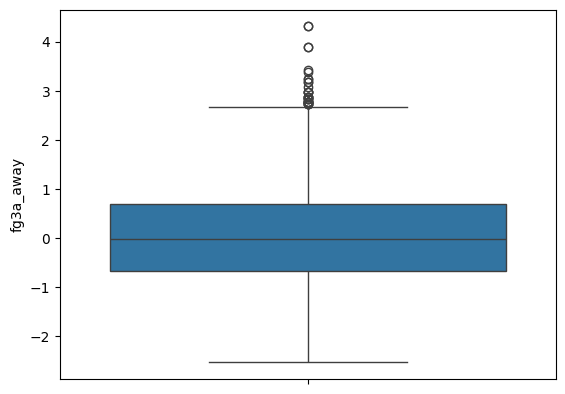

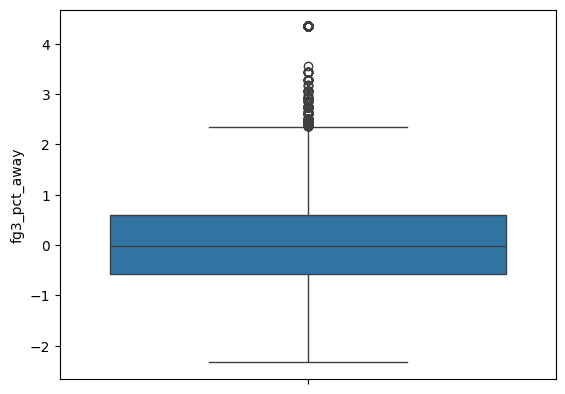

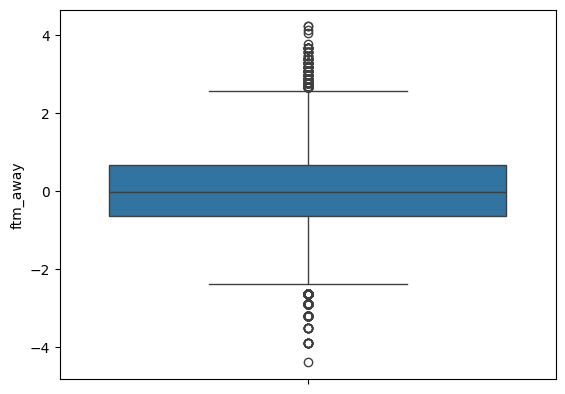

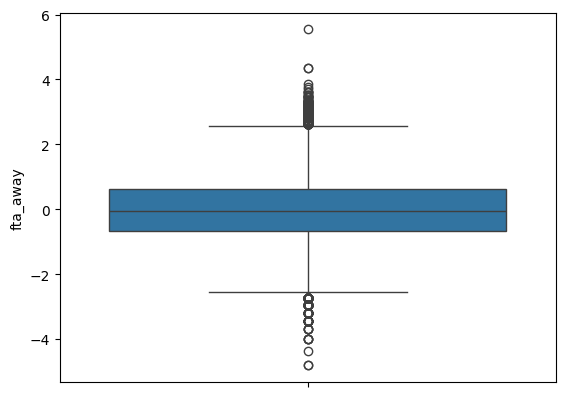

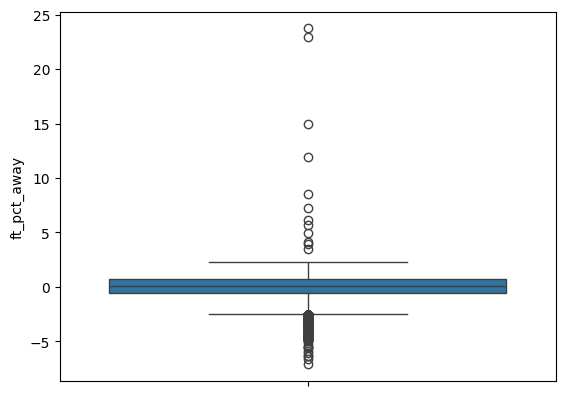

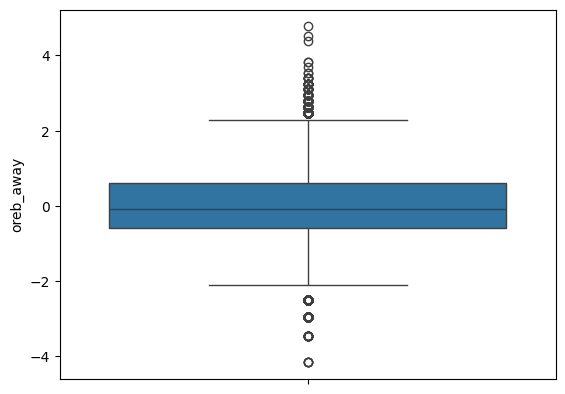

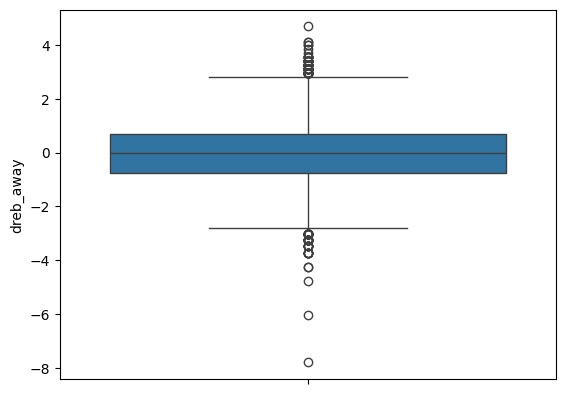

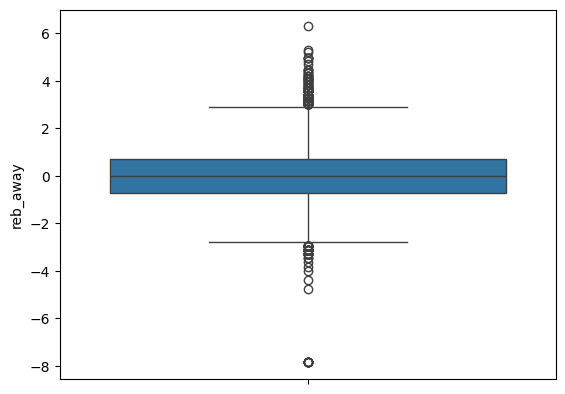

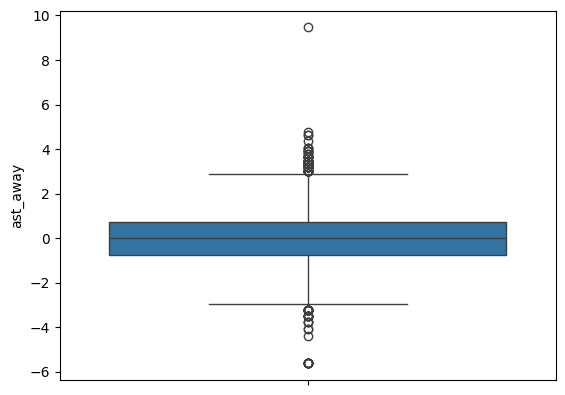

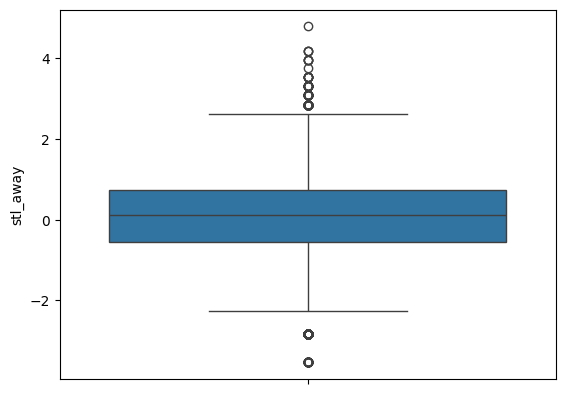

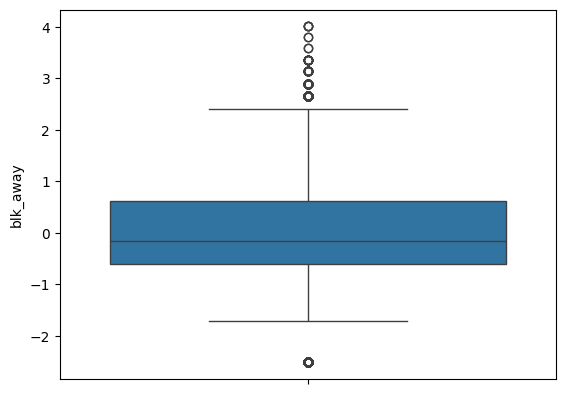

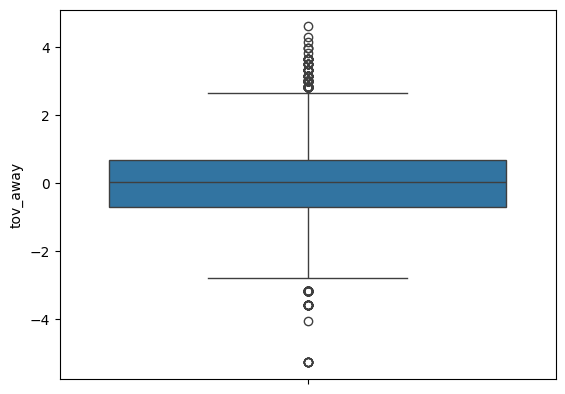

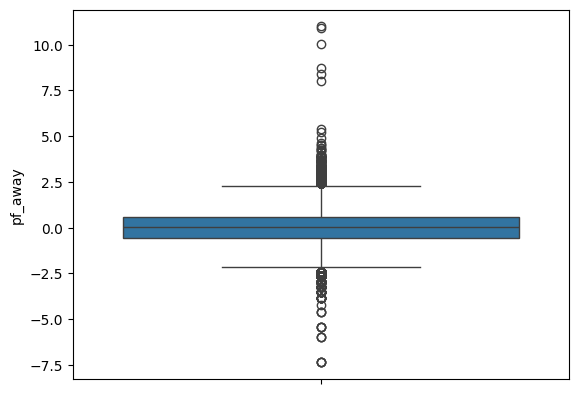

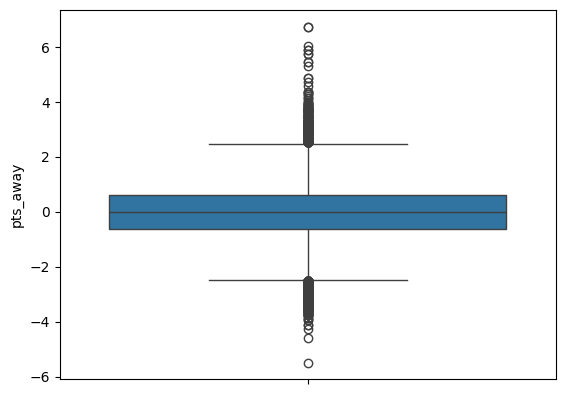

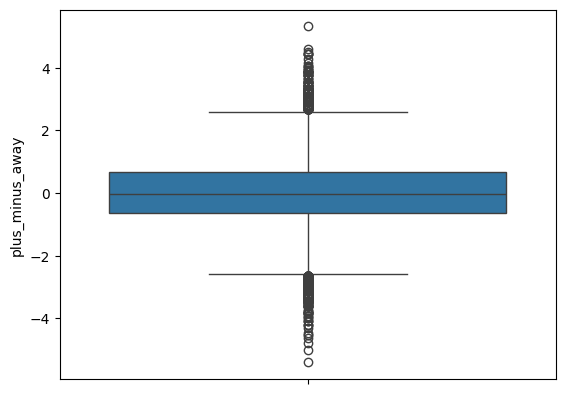

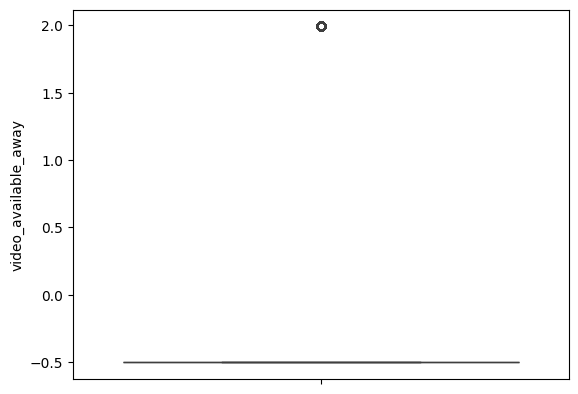

In [7]:
for col in df.columns:
    if col not in no_display_cols:
        sns.boxplot(df[col])
        plt.show()

In [ ]:

phik_overview = df.phik_matrix(interval_cols=df.select_dtypes(exclude="object").columns)
sns.heatmap(phik_overview, annot=True)

/opt/conda/envs/basketball/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable game_date is large: 12882. Are you sure this is not an interval variable? Analysis for pairs of variables including game_date can be slow.
  warnings.warn(
/opt/conda/envs/basketball/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable matchup_away is large: 2292. Are you sure this is not an interval variable? Analysis for pairs of variables including matchup_away can be slow.
  warnings.warn(
/opt/conda/envs/basketball/lib/python3.12/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable matchup_home is large: 2292. Are you sure this is not an interval variable? Analysis for pairs of variables including matchup_home can be slow.
  warnings.warn(
/opt/conda/envs/basketball/lib/python3.12/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 29525544. Are in

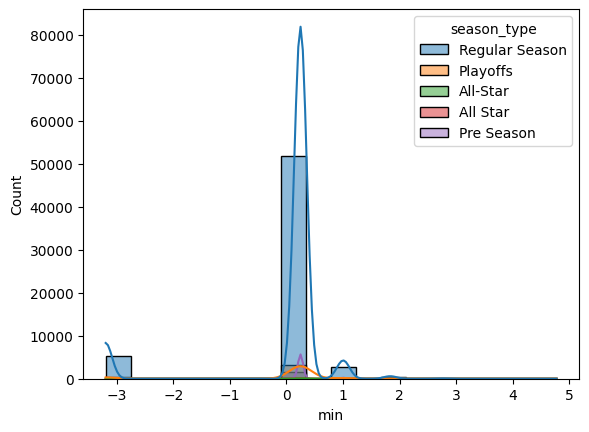

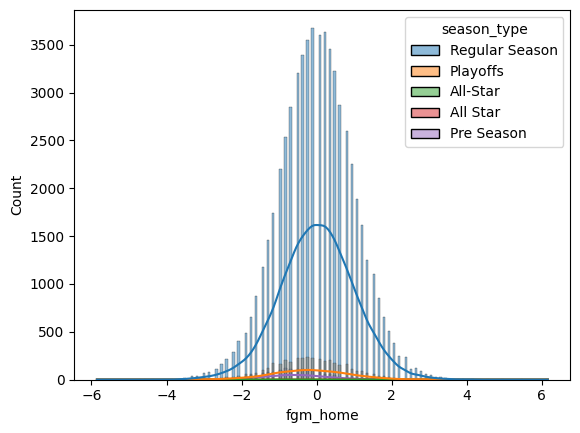

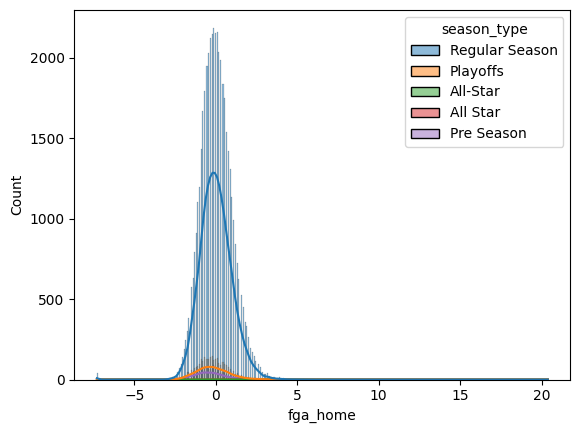

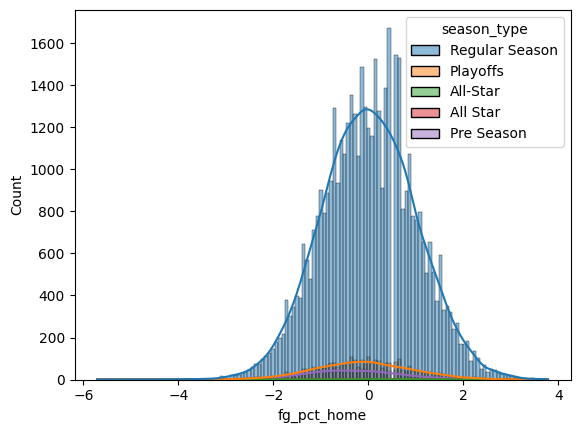

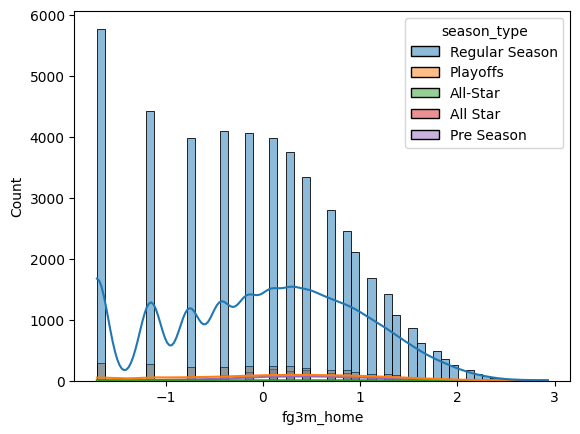

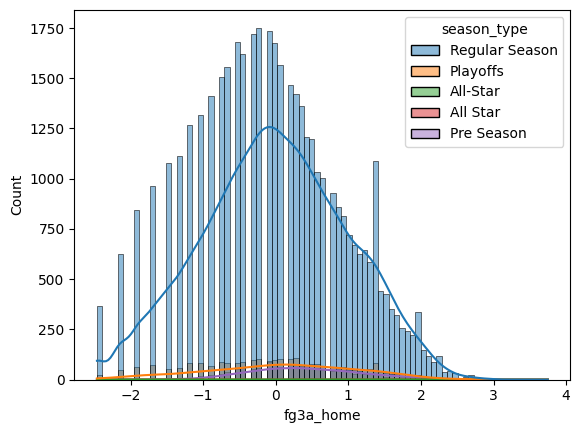

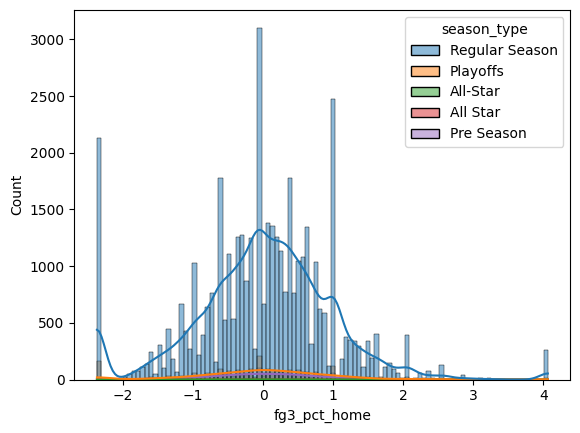

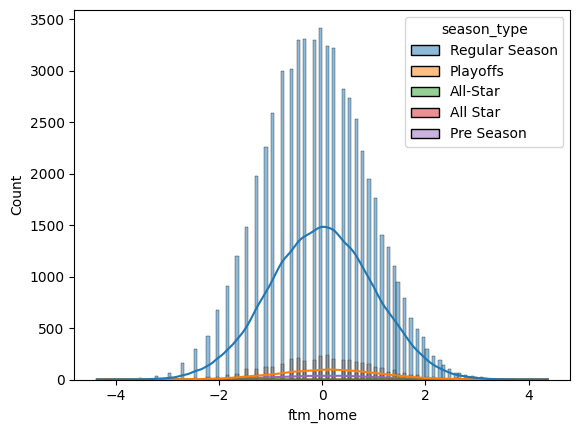

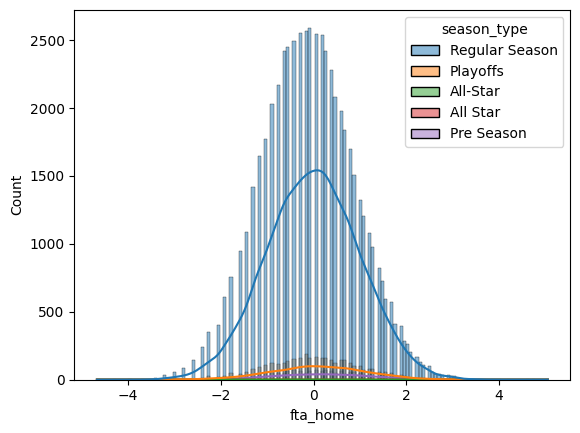

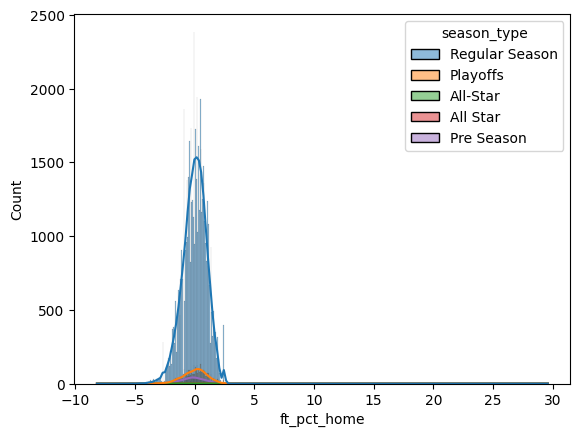

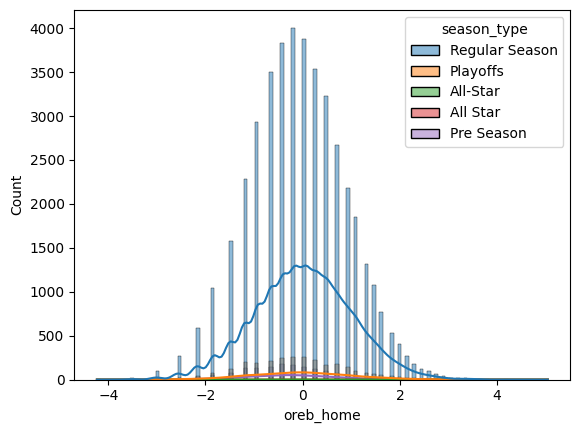

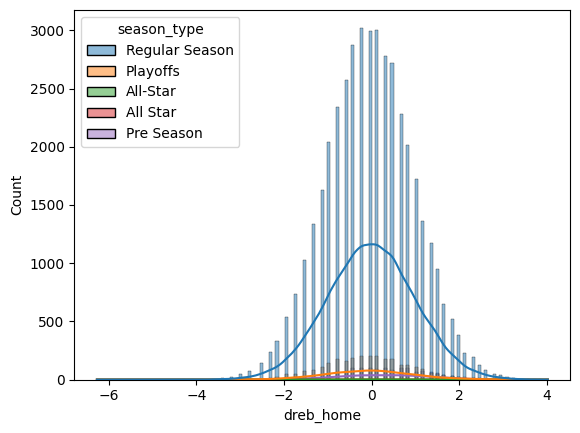

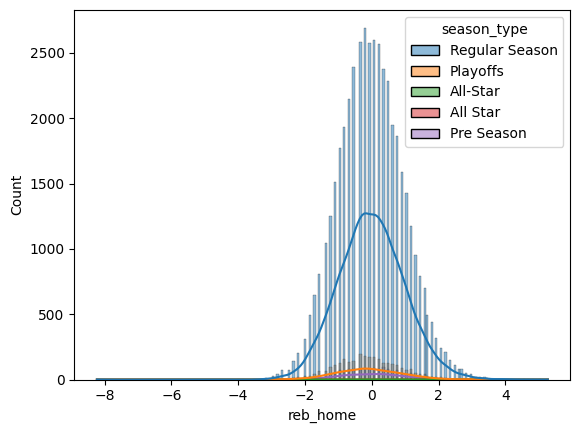

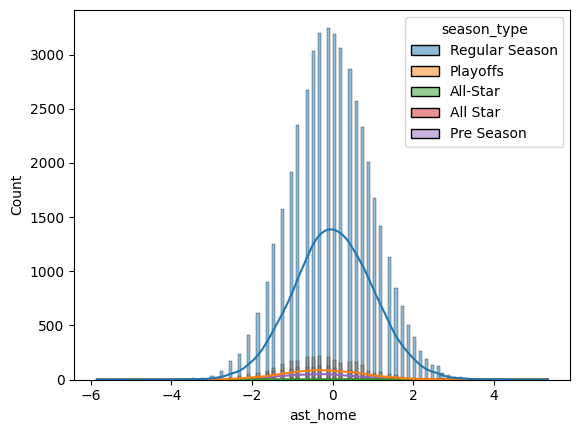

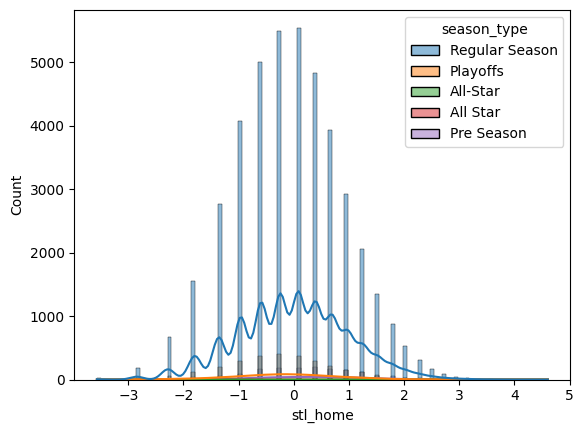

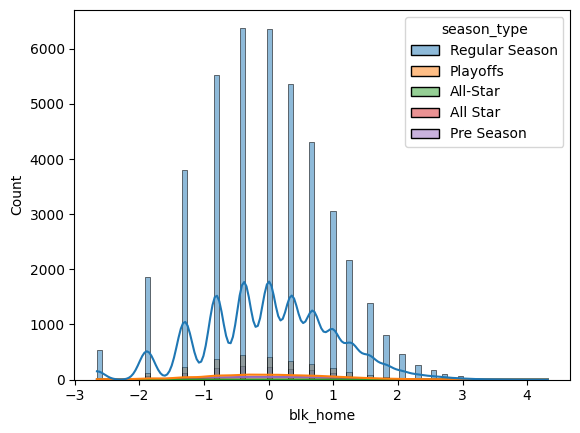

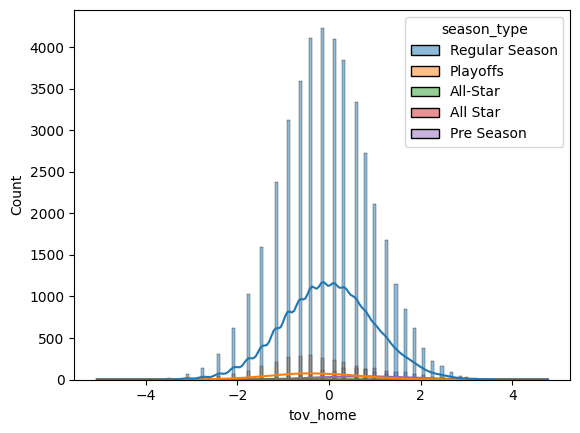

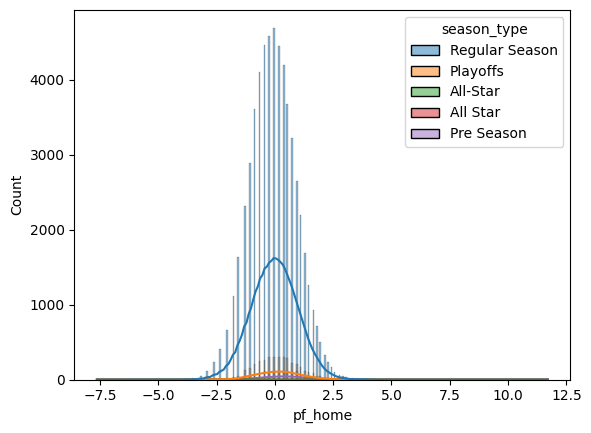

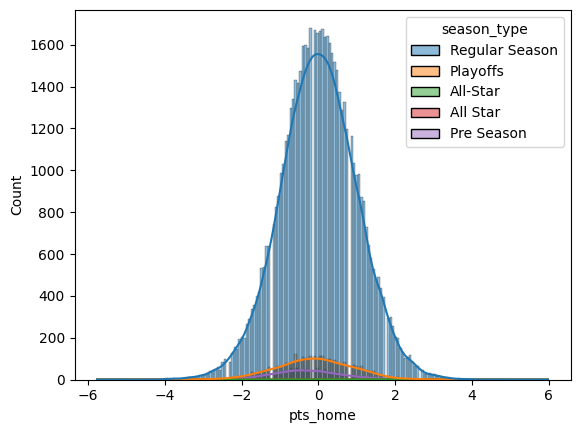

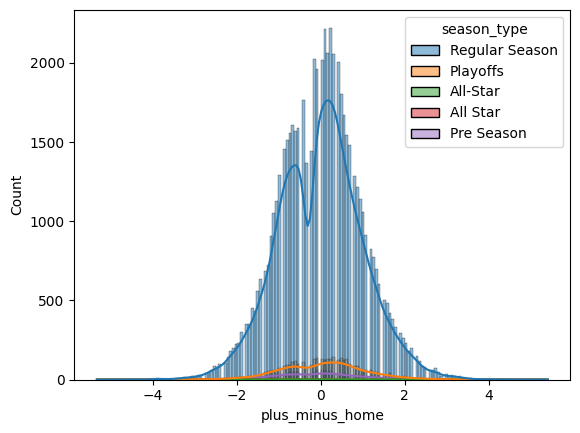

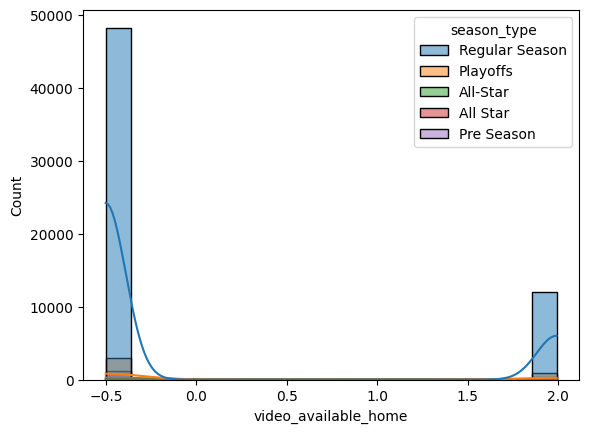

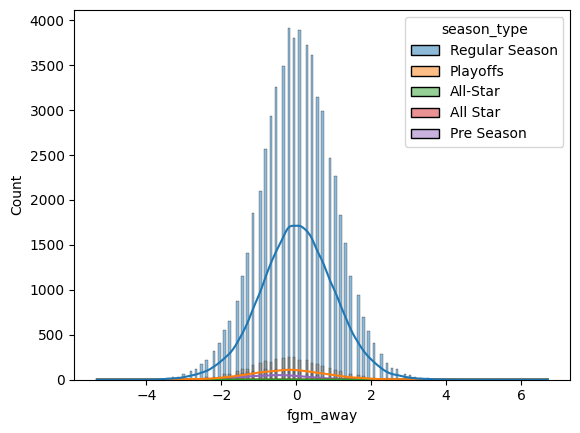

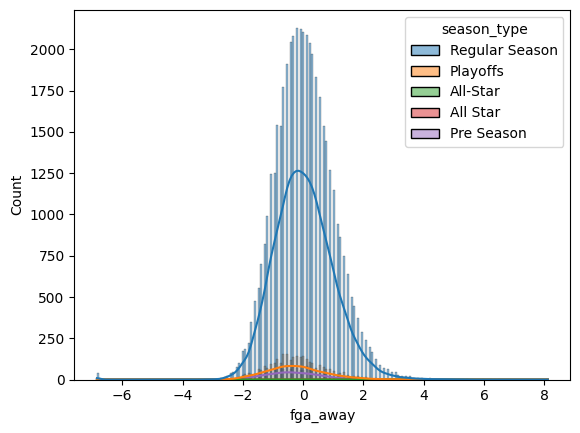

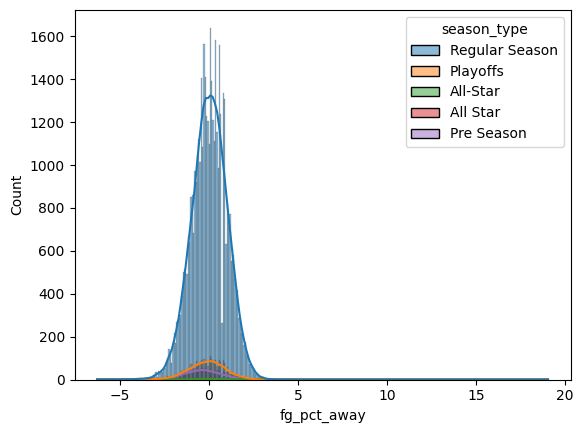

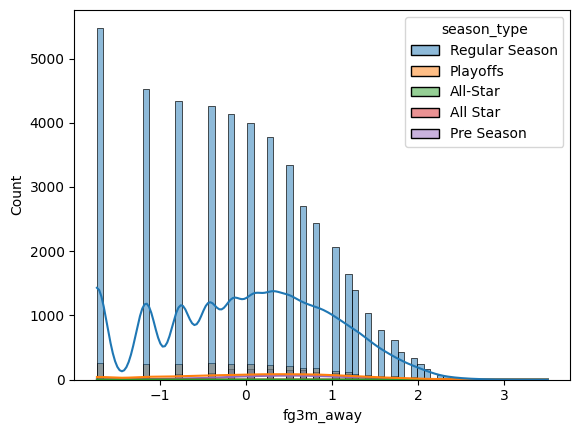

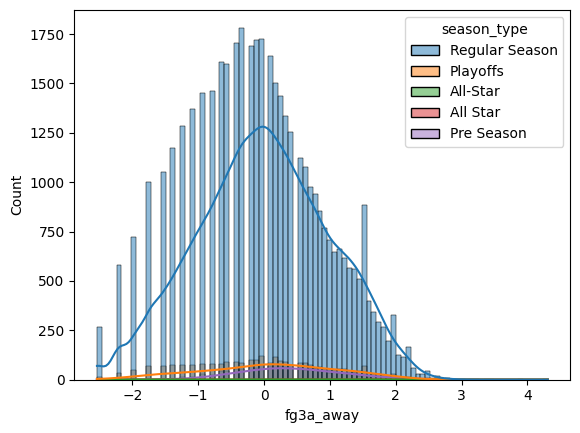

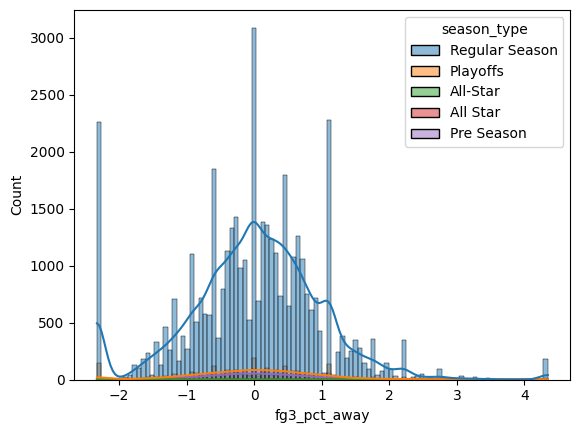

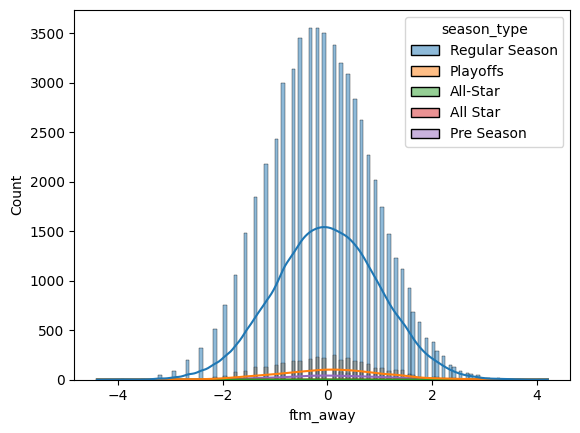

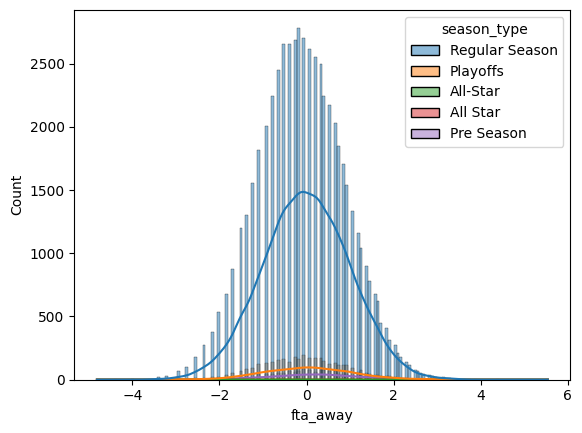

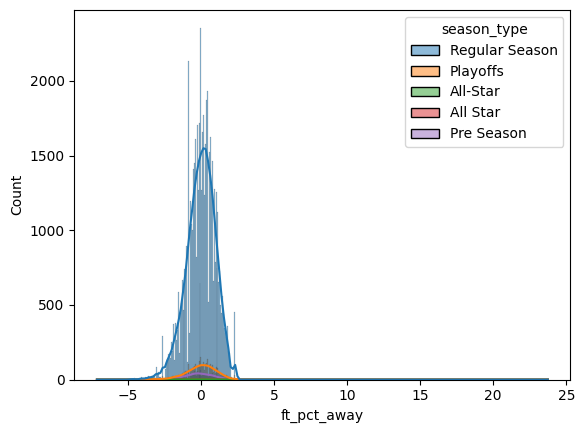

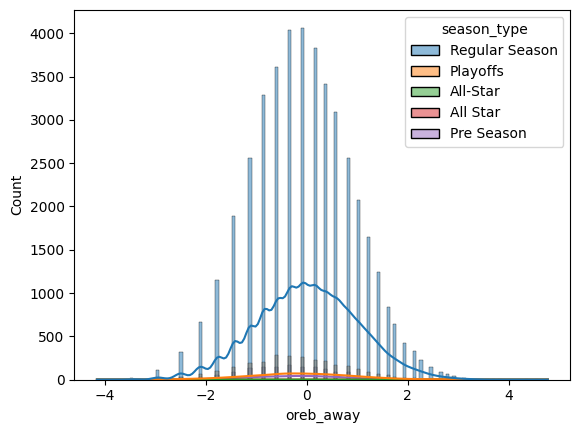

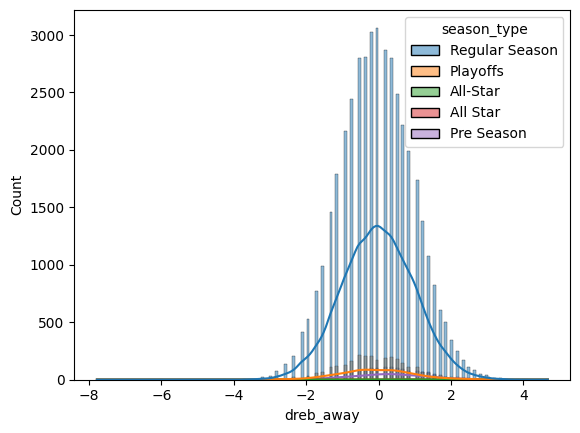

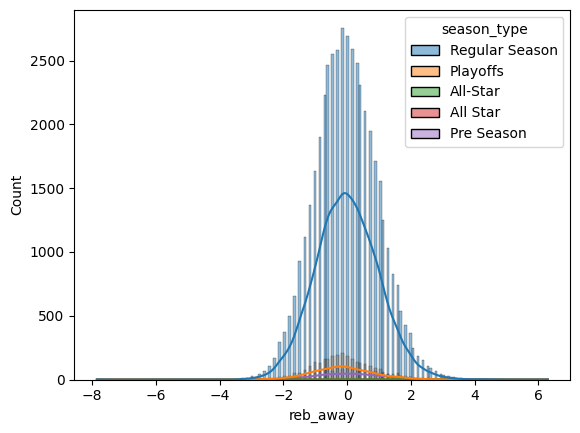

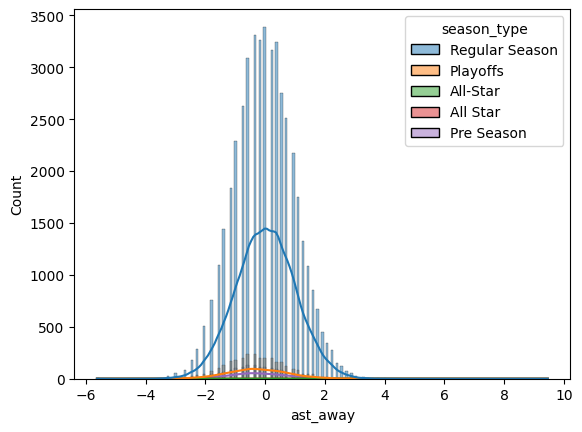

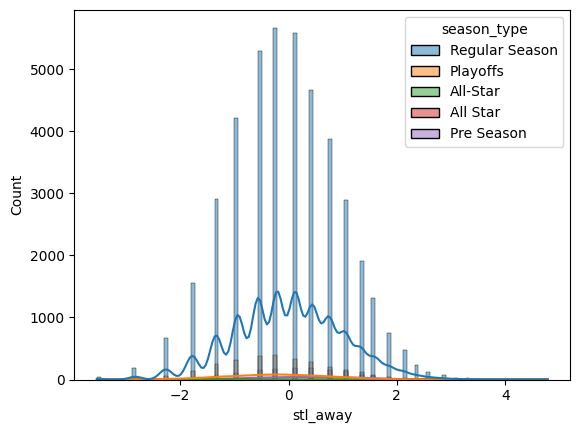

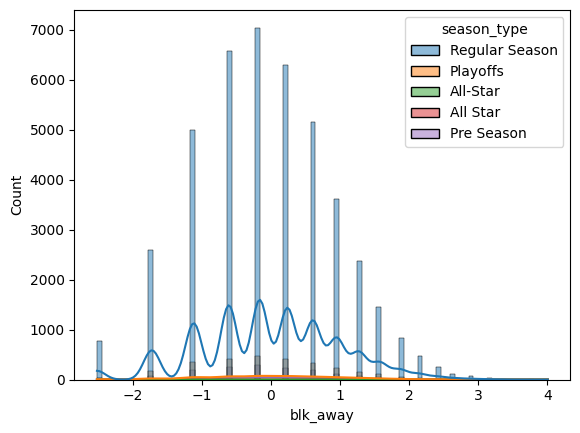

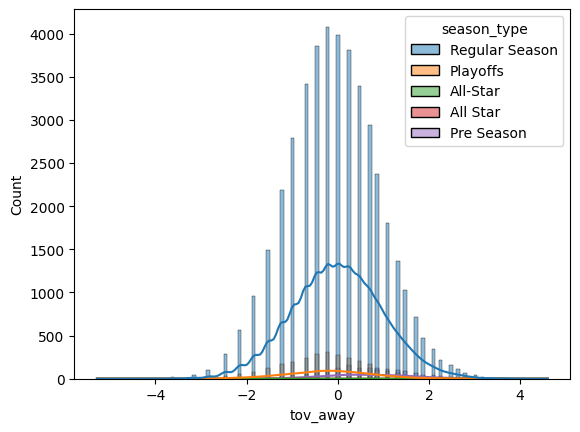

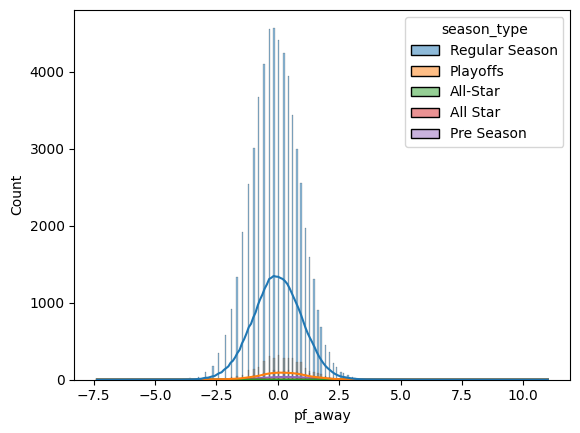

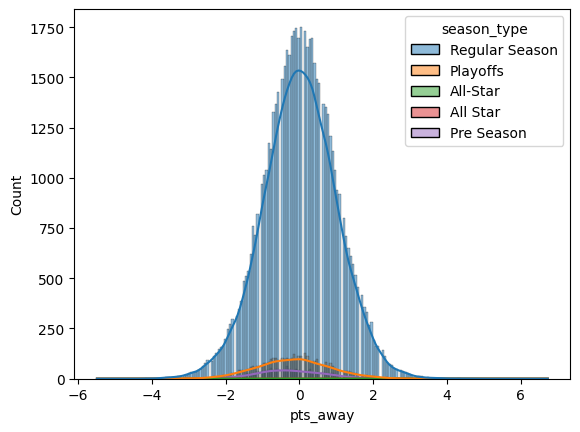

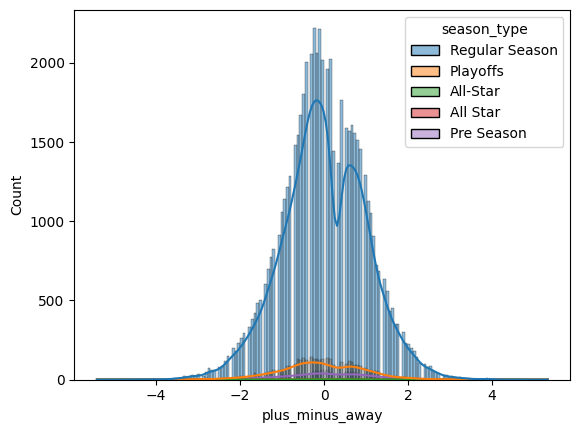

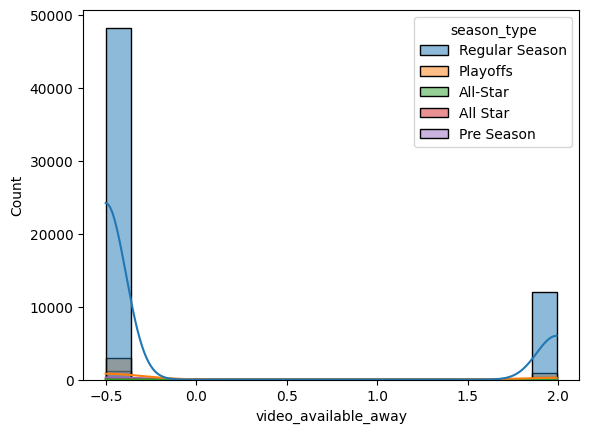

In [10]:
for col in df.columns:
    if col not in no_display_cols:
        sns.histplot(df, x=col, kde=True, hue='season_type')
        plt.show()